# Library

In [273]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from wordcloud import WordCloud

# Scraping

In [159]:
url = "https://myanimelist.net/anime/40748/Jujutsu_Kaisen/reviews"
data = []

In [160]:
driver = webdriver.Chrome()
driver.get(url)

while True:
    soup = BeautifulSoup(driver.page_source,"html.parser")
    for item in soup.findAll('div', class_='review-element'):
        username = item.find('div', class_='username').text
        date = item.find('div', class_='update_at').text
        recommendation = item.find('div', class_='btn-label').text
        
        review = item.find('div', class_='text').text
        rating = item.find('div', class_='rating').text
        data.append(
            (username, date, recommendation, review, rating)
        )

    try:
        WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'a.ga-click[data-ga-click-type="review-more-reviews"]')))
        driver.find_element(By.CSS_SELECTOR, 'a.ga-click[data-ga-click-type="review-more-reviews"]').click()
    except Exception as e:
        print(e)
        break

driver.close()
print('Reviews:', len(data))

Message: 



443

# Convert to DataFrame

In [214]:
df = pd.DataFrame(data, columns=['username', 'date', 'recommendation', 'review', 'rating'])
df

,username,date,recommendation,review,rating
0,\nTwumi\n,"Mar 26, 2021",Recommended,\n After the ridiculous success...,\n Reviewer’s Rating: 9\n
1,\nmydayruined\n,"Nov 6, 2020",Recommended,\n *Contains minor spoilers*\n\...,\n Reviewer’s Rating: 9\n
2,\nSunlitSonata\n,"Mar 26, 2021",Recommended,\n The thing about trends that ...,\n Reviewer’s Rating: 8\n
3,\nL1eske\n,"Nov 13, 2020",Recommended,\n I rate shit on enjoyment bec...,\n Reviewer’s Rating: 10\n
4,\nAspection\n,"Apr 17, 2021",Mixed Feelings,\n This show is as average as t...,\n Reviewer’s Rating: 5\n
...,...,...,...,...,...
438,\nPezguy97\n,"Dec 13, 2023",Mixed Feelings,"\n Objectively speaking, JJK Se...",\n Reviewer’s Rating: 6\n
439,\nsop12\n,"Aug 3, 2022",Recommended,"\n Jujutsu Kaisen, another shou...",\n Reviewer’s Rating: 10\n
440,\nIamChainsawman\n,"Oct 11, 2022",Not Recommended,\n Ridiculously overrated it’s ...,\n Reviewer’s Rating: 1\n
441,\nReddPaanda\n,"Dec 29, 2023",Mixed Feelings,\n It took me a while to finish...,\n Reviewer’s Rating: 5\n


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   username        443 non-null    object
 1   date            443 non-null    object
 2   recommendation  443 non-null    object
 3   review          443 non-null    object
 4   rating          443 non-null    object
dtypes: object(5)
memory usage: 17.4+ KB


# Check missing values

In [216]:
def null_checker(dataframe):
    null_values = dataframe.isnull()
    if null_values.any().any():
        print("There are null values in the dataframe.")
    else:
        print("There are no null values in the dataframe.")

null_checker(df)

There are no null values in the dataframe.


# Preprocessing

In [217]:
df_clean = pd.DataFrame(df)
df_clean

,username,date,recommendation,review,rating
0,\nTwumi\n,"Mar 26, 2021",Recommended,\n After the ridiculous success...,\n Reviewer’s Rating: 9\n
1,\nmydayruined\n,"Nov 6, 2020",Recommended,\n *Contains minor spoilers*\n\...,\n Reviewer’s Rating: 9\n
2,\nSunlitSonata\n,"Mar 26, 2021",Recommended,\n The thing about trends that ...,\n Reviewer’s Rating: 8\n
3,\nL1eske\n,"Nov 13, 2020",Recommended,\n I rate shit on enjoyment bec...,\n Reviewer’s Rating: 10\n
4,\nAspection\n,"Apr 17, 2021",Mixed Feelings,\n This show is as average as t...,\n Reviewer’s Rating: 5\n
...,...,...,...,...,...
438,\nPezguy97\n,"Dec 13, 2023",Mixed Feelings,"\n Objectively speaking, JJK Se...",\n Reviewer’s Rating: 6\n
439,\nsop12\n,"Aug 3, 2022",Recommended,"\n Jujutsu Kaisen, another shou...",\n Reviewer’s Rating: 10\n
440,\nIamChainsawman\n,"Oct 11, 2022",Not Recommended,\n Ridiculously overrated it’s ...,\n Reviewer’s Rating: 1\n
441,\nReddPaanda\n,"Dec 29, 2023",Mixed Feelings,\n It took me a while to finish...,\n Reviewer’s Rating: 5\n


In [218]:
# Cetak DataFrame sebelum perubahan
print("DataFrame sebelum perubahan:")
print(df['username'].head())

# Menghapus karakter newline dari kolom 'username'
df_clean['username'] = df_clean['username'].str.strip('\n')

# Cetak DataFrame setelah perubahan
print("\nDataFrame setelah perubahan:")
print(df_clean['username'].head())

DataFrame sebelum perubahan:
0           \nTwumi\n
1     \nmydayruined\n
2    \nSunlitSonata\n
3          \nL1eske\n
4       \nAspection\n
Name: username, dtype: object

DataFrame setelah perubahan:
0           Twumi
1     mydayruined
2    SunlitSonata
3          L1eske
4       Aspection
Name: username, dtype: object


In [219]:
# Cetak DataFrame sebelum perubahan
print("DataFrame sebelum perubahan:")
print(df['date'].dtypes)

# Konversi kolom 'date' ke tipe data datetime
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%b %d, %Y')

# Cetak DataFrame setelah perubahan
print("\nDataFrame setelah perubahan:")
print(df_clean['date'].dtypes)

DataFrame sebelum perubahan:
object

DataFrame setelah perubahan:
datetime64[ns]


In [220]:
# Cetak DataFrame sebelum perubahan
print("DataFrame sebelum perubahan:")
print(df['rating'].head())

# Membersihkan kolom 'rating' dan mengonversi ke tipe data numerik
df_clean['rating'] = df_clean['rating'].str.extract('(\d+\.\d+|\d+)').astype(float)

# Cetak DataFrame setelah perubahan
print("\nDataFrame setelah perubahan:")
print(df_clean['rating'].head())

DataFrame sebelum perubahan:
0     \n        Reviewer’s Rating: 9\n
1     \n        Reviewer’s Rating: 9\n
2     \n        Reviewer’s Rating: 8\n
3    \n        Reviewer’s Rating: 10\n
4     \n        Reviewer’s Rating: 5\n
Name: rating, dtype: object

DataFrame setelah perubahan:
0     9.0
1     9.0
2     8.0
3    10.0
4     5.0
Name: rating, dtype: float64


In [221]:
# Cetak DataFrame sebelum perubahan
print("DataFrame sebelum perubahan:")
print(df['review'].head())

# Membersihkan kolom 'review'
df_clean['review'] = df_clean['review'].str.replace('\n', ' ').str.strip()
# Remove double or more spaces in the 'review' column
# df['review'] = df['review'].str.replace(r'\s{2,}', ' ', regex=True)

# Cetak DataFrame setelah perubahan
print("\nDataFrame setelah perubahan:")
print(df_clean['review'].head())

DataFrame sebelum perubahan:
0    \n                After the ridiculous success...
1    \n                *Contains minor spoilers*\n\...
2    \n                The thing about trends that ...
3    \n                I rate shit on enjoyment bec...
4    \n                This show is as average as t...
Name: review, dtype: object

DataFrame setelah perubahan:
0    After the ridiculous success of Demon Slayer, ...
1    *Contains minor spoilers*  For me the Shōnen G...
2    The thing about trends that a lot of people ta...
3    I rate shit on enjoyment because that is what'...
4    This show is as average as they come, personal...
Name: review, dtype: object


In [222]:
df_clean['review'].head(1)

0    After the ridiculous success of Demon Slayer, ...
Name: review, dtype: object

In [223]:
df_clean.head()

,username,date,recommendation,review,rating
0,Twumi,2021-03-26,Recommended,"After the ridiculous success of Demon Slayer, ...",9.0
1,mydayruined,2020-11-06,Recommended,*Contains minor spoilers* For me the Shōnen G...,9.0
2,SunlitSonata,2021-03-26,Recommended,The thing about trends that a lot of people ta...,8.0
3,L1eske,2020-11-13,Recommended,I rate shit on enjoyment because that is what'...,10.0
4,Aspection,2021-04-17,Mixed Feelings,"This show is as average as they come, personal...",5.0


In [224]:
df_clean.to_csv('MyAnimeList.csv', index=False)

# Exploratory Data Analysis

In [259]:
df_clean

,username,date,recommendation,review,rating
0,Twumi,2021-03-26,Recommended,"After the ridiculous success of Demon Slayer, ...",9.0
1,mydayruined,2020-11-06,Recommended,*Contains minor spoilers* For me the Shōnen G...,9.0
2,SunlitSonata,2021-03-26,Recommended,The thing about trends that a lot of people ta...,8.0
3,L1eske,2020-11-13,Recommended,I rate shit on enjoyment because that is what'...,10.0
4,Aspection,2021-04-17,Mixed Feelings,"This show is as average as they come, personal...",5.0
...,...,...,...,...,...
438,Pezguy97,2023-12-13,Mixed Feelings,"Objectively speaking, JJK Season 1 is just not...",6.0
439,sop12,2022-08-03,Recommended,"Jujutsu Kaisen, another shounen anime of the n...",10.0
440,IamChainsawman,2022-10-11,Not Recommended,Ridiculously overrated it’s nothing more than ...,1.0
441,ReddPaanda,2023-12-29,Mixed Feelings,It took me a while to finish this one.. It's p...,5.0


In [260]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   username        443 non-null    object        
 1   date            443 non-null    datetime64[ns]
 2   recommendation  443 non-null    object        
 3   review          443 non-null    object        
 4   rating          443 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 17.4+ KB


In [261]:
df_clean.describe()

,rating
count,443.000000
mean,7.819413
std,2.004268
min,1.000000
25%,7.000000
50%,8.000000
75%,9.000000
max,10.000000


Berdasarkan analisis rating untuk anime "Jujutsu Kaisen", data statistik menunjukkan sejumlah 443 penilaian. Rata-rata rating yang diberikan oleh penonton adalah sekitar 7.82, dengan deviasi standar sebesar 2.00, mengindikasikan sejauh mana variasi penilaian dari rata-rata. Rating terendah yang diberikan untuk anime ini adalah 1.00, sedangkan rating tertinggi mencapai 10.00, mencerminkan variasi ekstrem dalam pandangan penonton. Secara lebih rinci, 25% dari rating berada pada tingkat 7.00 atau di bawahnya, sedangkan 50% berada pada tingkat 8.00. Rating pada kuartil ketiga (75%) mencapai 9.00, menunjukkan bahwa sebagian besar penonton memberikan penilaian yang tinggi untuk "Jujutsu Kaisen". Data ini memberikan gambaran tentang distribusi rating dan sejauh mana anime ini diterima dan dinikmati oleh penontonnya.

## Recommendation

In [263]:
value_counts = df_clean['recommendation'].value_counts()
value_counts

Recommended        333
Mixed Feelings      79
Not Recommended     31
Name: recommendation, dtype: int64

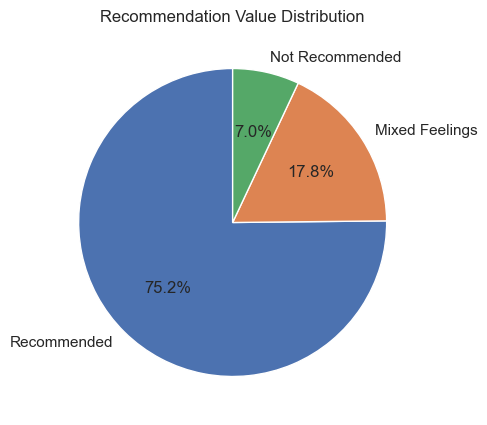

In [264]:
# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='recommendation', data=df_clean, order=value_counts.index)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Recommendation Value Counts')

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Convert countplot to pie chart
plt.clf()  # Clear the previous plot
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Recommendation Value Distribution')
plt.show()

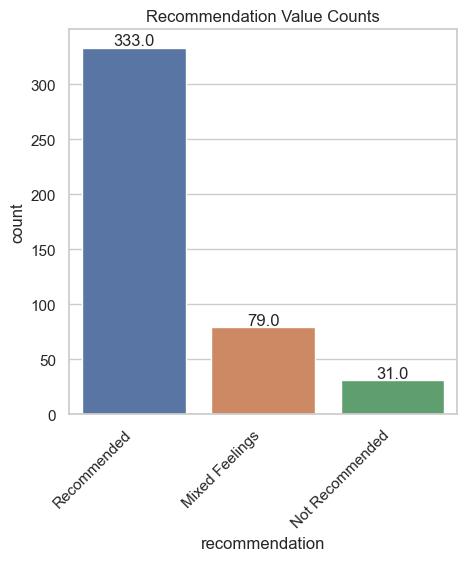

In [265]:
# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='recommendation', data=df_clean, order=value_counts.index)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Recommendation Value Counts')

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Berdasarkan data rekomendasi untuk anime "Jujutsu Kaisen", sebanyak 333 orang merekomendasikan anime ini dengan sangat positif. Terdapat juga 79 orang yang memiliki perasaan campuran atau pendapat yang bersifat netral terhadap anime tersebut. Meskipun demikian, sebanyak 31 orang menyarankan untuk tidak menonton anime ini. Meski angka rekomendasi tinggi menunjukkan bahwa mayoritas penonton merasa puas dengan pengalaman menonton "Jujutsu Kaisen", penting untuk mempertimbangkan variasi pandangan yang mungkin mencerminkan selera dan preferensi yang berbeda di antara penontonnya.

## Rating

In [266]:
value_counts = df_clean['rating'].value_counts()
value_counts

9.0     100
10.0    100
8.0      84
7.0      54
6.0      49
5.0      28
4.0      14
1.0       8
3.0       4
2.0       2
Name: rating, dtype: int64

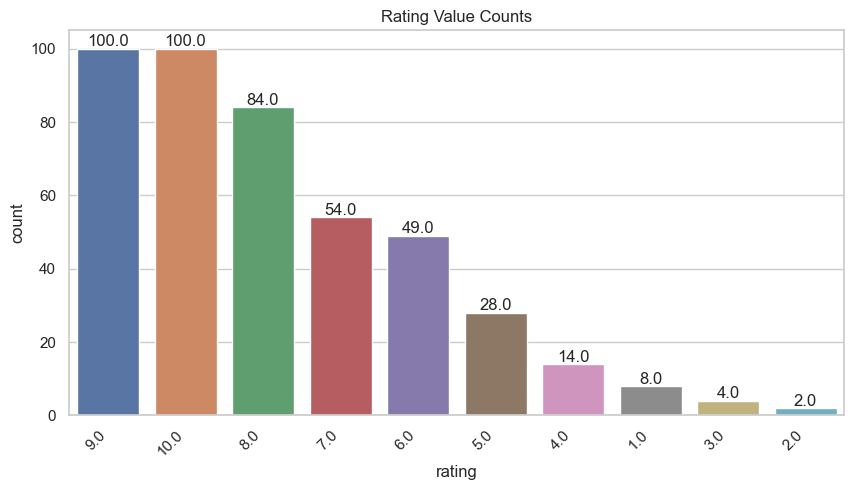

In [267]:

# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='rating', data=df_clean, order=value_counts.index)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Rating Value Counts')

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Anime "Jujutsu Kaisen" menerima sejumlah rating yang beragam dari penontonnya. Sebanyak 100 orang memberikan rating maksimal, yaitu 10.0, menunjukkan penerimaan yang sangat positif terhadap kualitas dan kisah anime ini. Selanjutnya, 100 orang memberikan rating 9.0, menyiratkan bahwa sebagian besar penonton tetap memberikan penilaian tinggi terhadap anime ini. Dengan jumlah 84 orang memberikan rating 8.0, anime ini terus mendapat apresiasi yang kuat. Namun, terdapat juga variasi pendapat, di mana 54 orang memberikan rating 7.0, 49 orang memberikan rating 6.0, dan 28 orang memberikan rating 5.0. Adanya penilaian di bawah 7.0 menunjukkan bahwa ada sebagian penonton yang mungkin memiliki pandangan yang lebih netral atau sedikit kurang puas dengan anime ini. Terdapat juga sejumlah kecil penonton yang memberikan rating rendah, seperti 4.0, 3.0, 2.0, dan 1.0, yang mencerminkan adanya perbedaan selera di antara audiens "Jujutsu Kaisen".

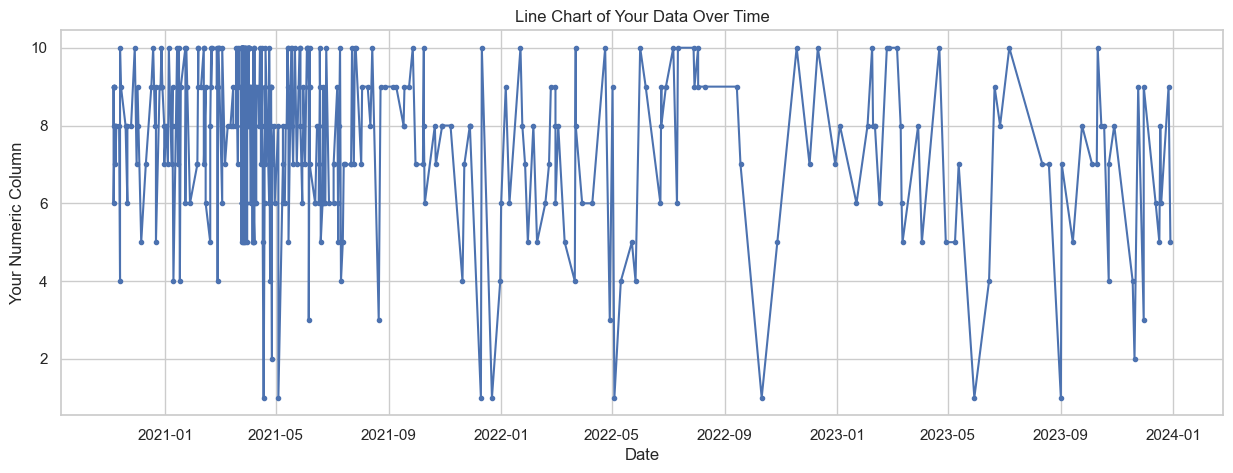

In [268]:
# Sort the DataFrame by the 'date' column
df_date = df_clean.sort_values('date')

# Plotting the line chart
plt.figure(figsize=(15, 5))
plt.plot(df_date['date'], df_date['rating'], marker='.', linestyle='-')

# Customize the plot
plt.title('Line Chart of Your Data Over Time')
plt.xlabel('Date')
plt.ylabel('Your Numeric Column')
plt.grid(True)
plt.show()

## Date

In [269]:
monthly_counts

date
2020-11-30    19
2020-12-31    17
2021-01-31    19
2021-02-28    23
2021-03-31    99
2021-04-30    59
2021-05-31    27
2021-06-30    27
2021-07-31    18
2021-08-31     8
2021-09-30     8
2021-10-31     8
2021-11-30     6
2021-12-31     4
2022-01-31     7
2022-02-28     5
2022-03-31     9
2022-04-30     3
2022-05-31     5
2022-06-30     6
2022-07-31     5
2022-08-31     3
2022-09-30     2
2022-10-31     2
2022-11-30     1
2022-12-31     3
2023-01-31     2
2023-02-28     8
2023-03-31     5
2023-04-30     3
2023-05-31     3
2023-06-30     3
2023-07-31     1
2023-08-31     2
2023-09-30     4
2023-10-31     8
2023-11-30     5
2023-12-31     6
Freq: M, dtype: int64

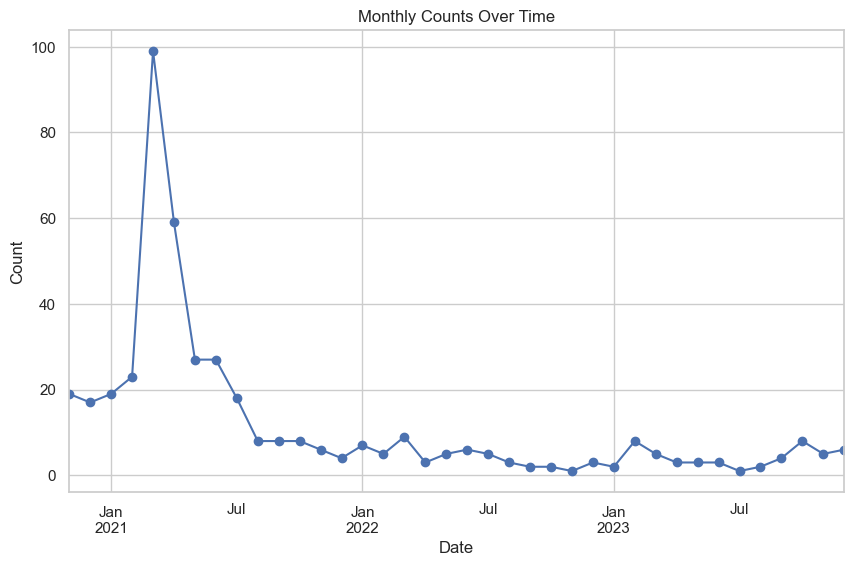

In [270]:
df_date = pd.DataFrame(df_clean)

# Set 'date' column as the index
df_date.set_index('date', inplace=True)

# Resample the data on a monthly basis and count occurrences
monthly_counts = df_date.resample('M').size()

# Plotting the line chart
plt.figure(figsize=(10, 6))
monthly_counts.plot(marker='o', linestyle='-')

# Customize the plot
plt.title('Monthly Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## WordCloud

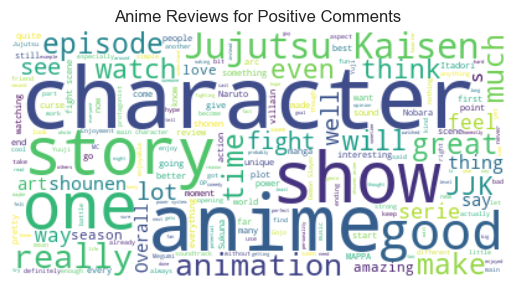

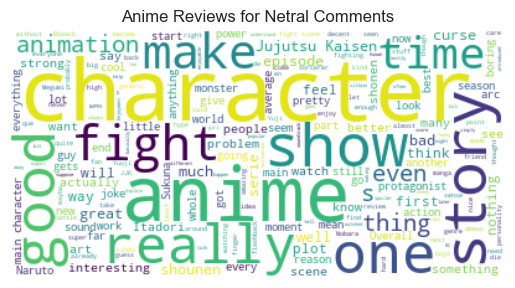

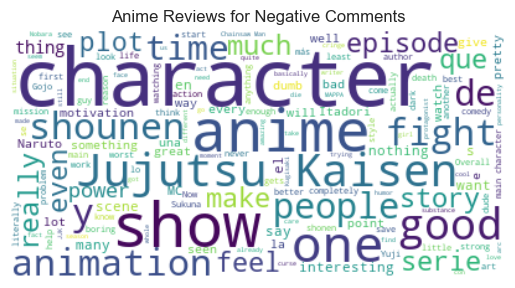

In [272]:
# Visualization anime reviews for positive comments
positive_comments = df_clean[df_clean['recommendation'] == 'Recommended']['review']
wordcloud = WordCloud(background_color='white').generate(' '.join(positive_comments))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Anime Reviews for Positive Comments")
plt.axis("off")
plt.show()

# Visualization anime reviews for netral comments
netral_comments = df_clean[df_clean['recommendation'] == 'Mixed Feelings']['review']
wordcloud = WordCloud(background_color='white').generate(' '.join(netral_comments))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Anime Reviews for Netral Comments")
plt.axis("off")
plt.show()

# Visualization anime reviews for negative comments
negative_comments = df_clean[df_clean['recommendation'] == 'Not Recommended']['review']
wordcloud = WordCloud(background_color='white').generate(' '.join(negative_comments))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Anime Reviews for Negative Comments")
plt.axis("off")
plt.show()